In [1]:
!pip install moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 10.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 51.7 MB/s eta 0:00:00:00:0100:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110721 sha256=6a5e5171d4dde5f67a6357014127b24f7812eea2f2c7fd395c71cc7976a00091
  Stored in directory: /root/.cache/pip/wheels/96/32/2d/e10123bd88fbfc02fed53cc18c80a171d3c87479ed845fa7c1
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [2]:
from transformers import Wav2Vec2Tokenizer, Wav2Vec2ForCTC
from IPython.display import Audio
import moviepy.editor as mp
import torch
import librosa
import os

In [3]:
!pip install datasets

In [4]:
from datasets import load_dataset

ds = load_dataset(
    "DynamicSuperb/AutomaticSpeechRecognition_LJSpeech"
)

README.md:   0%|          | 0.00/581 [00:00<?, ?B/s]

(…)-00000-of-00008-5340e95df6075461.parquet:   0%|          | 0.00/479M [00:00<?, ?B/s]

(…)-00001-of-00008-c9a0a823edf1296f.parquet:   0%|          | 0.00/477M [00:00<?, ?B/s]

(…)-00002-of-00008-973f89d5cb827d2c.parquet:   0%|          | 0.00/474M [00:00<?, ?B/s]

(…)-00003-of-00008-c95c9d389e8055b7.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

(…)-00004-of-00008-25e6481b9219815c.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

(…)-00005-of-00008-c87380f45871e399.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

(…)-00006-of-00008-83ab4274738d6762.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

(…)-00007-of-00008-1be3c51ecb3eac29.parquet:   0%|          | 0.00/479M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/13100 [00:00<?, ? examples/s]

In [7]:
ds['test'][0]['audio']

{'path': 'LJ001-0001.wav',
 'array': array([-7.32421875e-04, -7.62939453e-04, -6.40869141e-04, ...,
         7.32421875e-04,  2.13623047e-04,  6.10351562e-05]),
 'sampling_rate': 22050}

In [8]:
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
model.eval()


Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [10]:
def speech_file_to_array_fn(batch):
    speech_array = batch["audio"]["array"]
    batch["input_values"] = tokenizer(speech_array, return_tensors="pt", padding="longest").input_values
    return batch


In [11]:
ds = ds.map(speech_file_to_array_fn, remove_columns=["audio", "file"])

Map:   0%|          | 0/13100 [00:00<?, ? examples/s]

Playing audio file 1/13100


Waveform shape: torch.Size([212893])
Spectrogram shape: torch.Size([64, 1065])
Sample rate: 16000
Label: printing in the only sense with which we are at present concerned differs from most if not from all the arts and crafts represented in the exhibition


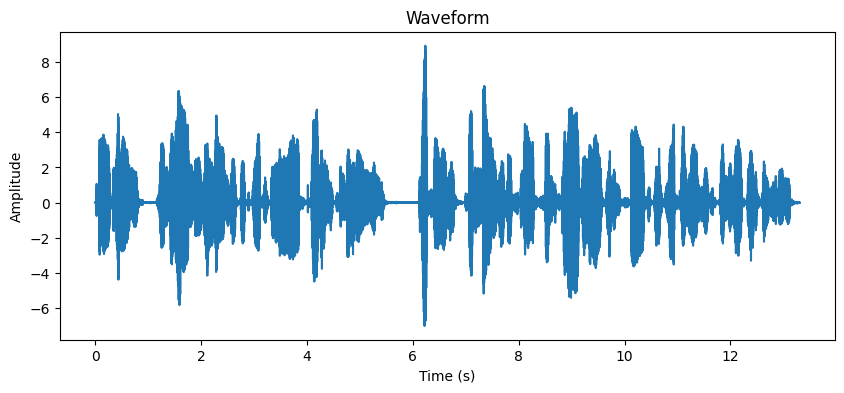

In [24]:
import torchaudio
import torch
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def play_audio_with_info(audio_array, original_sentence, sample_rate=16000):
    display(Audio(audio_array.numpy(), rate=sample_rate))
    print('Waveform shape:', audio_array.shape)
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_mels=64)(audio_array)
    print('Spectrogram shape:', mel_spectrogram.shape)
    print('Sample rate:', sample_rate)
    print("Label:", original_sentence)
    plt.figure(figsize=(10, 4))
    time_axis = torch.arange(0, len(audio_array)) / sample_rate
    plt.plot(time_axis.numpy(), audio_array.numpy())
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
total_files = len(ds['test'])
for i in range(min(1, total_files)):  
    audio_data = ds['test'][i]
    audio_array = torch.tensor(audio_data['input_values'][0], dtype=torch.float32) 
    original_sentence = audio_data['label']

    print(f'Playing audio file {i + 1}/{total_files}')
    play_audio_with_info(audio_array, original_sentence)


In [14]:
with torch.no_grad():
    input_values = ds['test'][0]["input_values"]
    if isinstance(input_values, list):
        input_values = torch.tensor(input_values)
    input_values = input_values.to(model.device)
    logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = tokenizer.decode(predicted_ids[0])

    print(f"Transcription: {transcription}")


Transcription: PRINTING IN THE ONLY SENSE WITH WHICH WE ARE AT PRESENT CONCERNED DIFFERS FROM MOST IF NOT FROM ALL THE ARTS AND CRAFTS REPRESENTED IN THE EXHIBITION
